Входные данные - данные с параметрами добычи и очистки
**Описание данных**

**Технологический процесс**

Rougher feed — исходное сырье

Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

Xanthate — ксантогенат (промотер, или активатор флотации);

Sulphate — сульфат (на данном производстве сульфид натрия);

Depressant — депрессант (силикат натрия).

Rougher process (англ. «грубый процесс») — флотация

Rougher tails — отвальные хвосты

Float banks — флотационная установка

Cleaner process — очистка

Rougher Au — черновой концентрат золота

Final Au — финальный концентрат золота

**Параметры этапов**

air amount — объём воздуха

fluid levels — уровень жидкости

feed size — размер гранул сырья

feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]

*Пример: rougher.input.feed_ag*
 
**Возможные значения для блока [этап]:**

rougher — флотация

primary_cleaner — первичная очистка

secondary_cleaner — вторичная очистка

final — финальные характеристики

**Возможные значения для блока [тип_параметра]:**

input — параметры сырья

output — параметры продукта

state — параметры, характеризующие текущее состояние этапа

calculation — расчётные характеристики

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [5]:
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [6]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [8]:
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [9]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

Создадим копию обучающей выборки:

In [11]:
df = train.copy()

Удалим пропуски:

In [12]:
df = df.dropna().reset_index(drop=True)

Напишем функцию для расчета эффективности обогащения концентрата:

In [13]:
def recovery(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    recovery = (C * (F - T)) / (F * (C - T)) * 100
    return recovery

Рассчитаем эффективность по данным обучающей выборки:

In [14]:
df['recovery'] = df.apply(recovery, axis=1)

Рассчитаем среднее абсолютное отклонение:

In [15]:
mean_absolute_error(df['recovery'], df['rougher.output.recovery'])

9.739730529255835e-15

Посмотрим признаки, которых нет в тестовой выборке:

In [16]:
set(train) - set(test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Посмотрим долю пропусков в обучающем наборе данных:

In [17]:
train.isna().mean()

date                                                  0.000000
final.output.concentrate_ag                           0.000071
final.output.concentrate_pb                           0.000071
final.output.concentrate_sol                          0.014913
final.output.concentrate_au                           0.000000
final.output.recovery                                 0.000000
final.output.tail_ag                                  0.000000
final.output.tail_pb                                  0.007068
final.output.tail_sol                                 0.000353
final.output.tail_au                                  0.000000
primary_cleaner.input.sulfate                         0.001414
primary_cleaner.input.depressant                      0.002262
primary_cleaner.input.feed_size                       0.000000
primary_cleaner.input.xanthate                        0.007068
primary_cleaner.output.concentrate_ag                 0.000000
primary_cleaner.output.concentrate_pb                 0

Изменим тип данных 'object' на 'datetime' в столбце 'date':

In [18]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%dT%H:%M:%S')

Отсортируем датасет по возрастанию значений даты и времени:

In [19]:
train = train.sort_values(by='date')

Заполним пропуски ближайшими по времени значениями:

In [20]:
train = train.fillna(method='ffill')

Посмотрим, что получилось:

In [21]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null datetime64[ns]
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant     

Проверим данные на наличие дубликатов:

In [23]:
train.duplicated().sum()

0

### Вывод

Эффективность обогащения концентрата в данных рассчитана корректно, MAE между расчетными и исходными обучающими данными 9.7e-15.

В тестовой выборке на всех этапах технологического процесса отсутствуют параметры продукта и расчетные характеристики, т.е. заключительные этапы всех процессов.

В обучающем наборе данных доля пропусков около 10%, пропуски заменим ближайшими по времени значениями. Дубликатов в данных нет.

## Анализ данных

Посмотрим распределение концентрации металлов на этапе флотации:

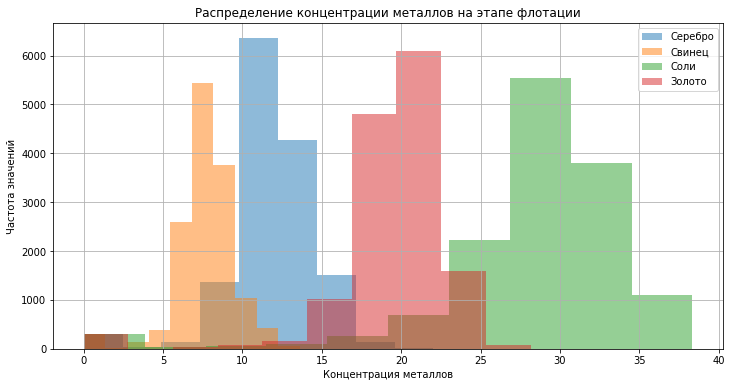

In [24]:
plt.figure(figsize=(12,6))
plt.hist(train['rougher.output.concentrate_ag'], alpha = 0.5, label='Серебро')
plt.hist(train['rougher.output.concentrate_pb'], alpha = 0.5, label='Свинец')
plt.hist(train['rougher.output.concentrate_sol'], alpha = 0.5, label='Соли')
plt.hist(train['rougher.output.concentrate_au'], alpha = 0.5, label='Золото')
plt.xlabel('Концентрация металлов')
plt.ylabel('Частота значений')
plt.title('Распределение концентрации металлов на этапе флотации')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим распределение концентрации металлов на этапе очистки:

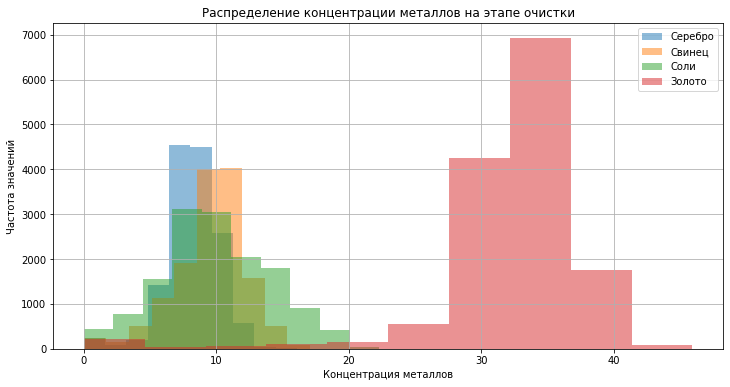

In [25]:
plt.figure(figsize=(12,6))
plt.hist(train['primary_cleaner.output.concentrate_ag'], alpha = 0.5, label='Серебро')
plt.hist(train['primary_cleaner.output.concentrate_pb'], alpha = 0.5, label='Свинец')
plt.hist(train['primary_cleaner.output.concentrate_sol'], alpha = 0.5, label='Соли')
plt.hist(train['primary_cleaner.output.concentrate_au'], alpha = 0.5, label='Золото')
plt.xlabel('Концентрация металлов')
plt.ylabel('Частота значений')
plt.title('Распределение концентрации металлов на этапе очистки')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим распределение финальной концентрации металлов:

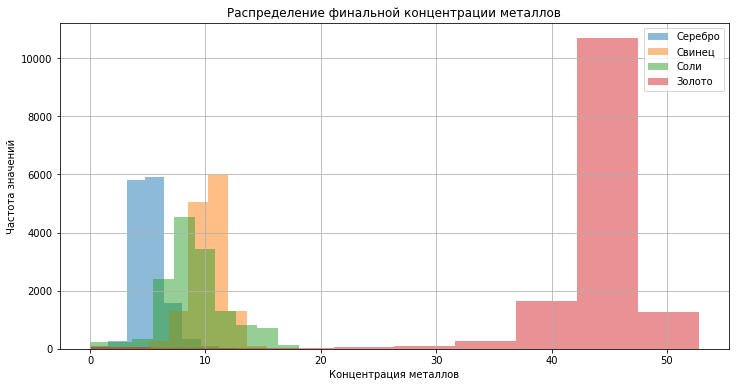

In [26]:
plt.figure(figsize=(12,6))
plt.hist(train['final.output.concentrate_ag'], alpha = 0.5, label='Серебро')
plt.hist(train['final.output.concentrate_pb'], alpha = 0.5, label='Свинец')
plt.hist(train['final.output.concentrate_sol'], alpha = 0.5, label='Соли')
plt.hist(train['final.output.concentrate_au'], alpha = 0.5, label='Золото')
plt.xlabel('Концентрация металлов')
plt.ylabel('Частота значений')
plt.title('Распределение финальной концентрации металлов')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим распределение гранул сырья по выборкам:

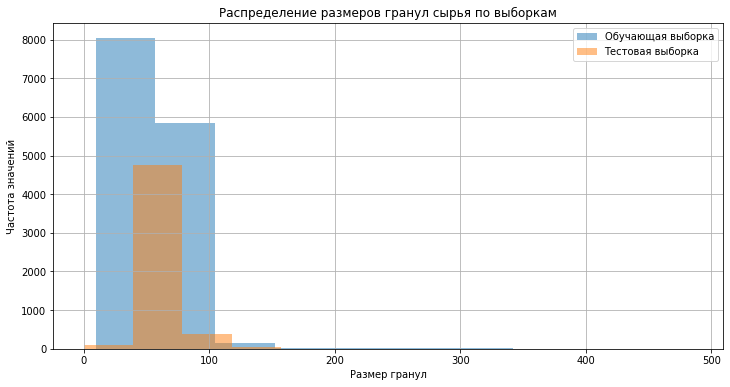

In [27]:
plt.figure(figsize=(12,6))
plt.hist(train['rougher.input.feed_size'], alpha = 0.5, label='Обучающая выборка')
plt.hist(test['rougher.input.feed_size'], alpha = 0.5, label='Тестовая выборка')
plt.xlabel('Размер гранул')
plt.ylabel('Частота значений')
plt.title('Распределение размеров гранул сырья по выборкам')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим распределение суммарной концентрации металлов по этапам обработки:

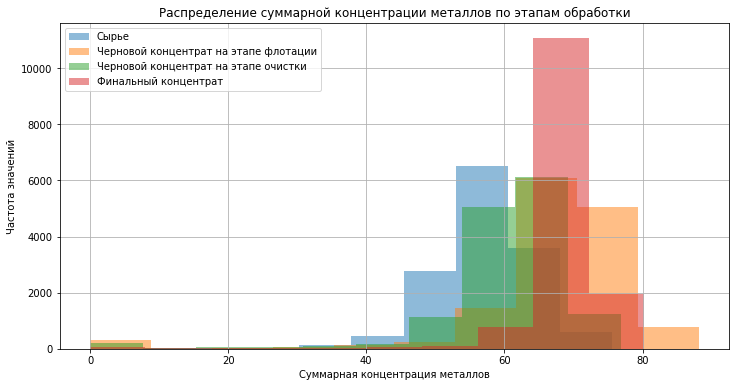

In [28]:
plt.figure(figsize=(12,6))
plt.hist((
    train['rougher.input.feed_ag'] +
    train['rougher.input.feed_pb'] +
    train['rougher.input.feed_sol'] +
    train['rougher.input.feed_ag']
),
    alpha = 0.5,
    label='Сырье')
plt.hist((
    train['rougher.output.concentrate_ag'] +
    train['rougher.output.concentrate_pb'] +
    train['rougher.output.concentrate_sol'] +
    train['rougher.output.concentrate_au']
),
    alpha = 0.5,
    label='Черновой концентрат на этапе флотации')
plt.hist((
    train['primary_cleaner.output.concentrate_ag'] +
    train['primary_cleaner.output.concentrate_pb'] +
    train['primary_cleaner.output.concentrate_sol'] +
    train['primary_cleaner.output.concentrate_au']
),
    alpha = 0.5,
    label='Черновой концентрат на этапе очистки')
plt.hist((
    train['final.output.concentrate_ag'] +
    train['final.output.concentrate_pb'] +
    train['final.output.concentrate_sol'] +
    train['final.output.concentrate_au']
),
    alpha = 0.5,
    label='Финальный концентрат')
plt.xlabel('Суммарная концентрация металлов')
plt.ylabel('Частота значений')
plt.title('Распределение суммарной концентрации металлов по этапам обработки')
plt.legend()
plt.grid(True)
plt.show()

Запишем суммарные концентрации металлов по этапам обработки в переменные:

In [29]:
rougher_input_feed = (
    train['rougher.input.feed_ag'] +
    train['rougher.input.feed_pb'] +
    train['rougher.input.feed_sol'] +
    train['rougher.input.feed_ag']
)

In [30]:
rougher_output_concentrate = (
    train['rougher.output.concentrate_ag'] +
    train['rougher.output.concentrate_pb'] +
    train['rougher.output.concentrate_sol'] +
    train['rougher.output.concentrate_au']
)

In [31]:
primary_cleaner_output_concentrate = (
    train['primary_cleaner.output.concentrate_ag'] +
    train['primary_cleaner.output.concentrate_pb'] +
    train['primary_cleaner.output.concentrate_sol'] +
    train['primary_cleaner.output.concentrate_au']
)

In [32]:
final_output_concentrate = (
    train['final.output.concentrate_ag'] +
    train['final.output.concentrate_pb'] +
    train['final.output.concentrate_sol'] +
    train['final.output.concentrate_au']
)

Отфильтруем датасет так, чтобы убрать нулевые значения суммарной концентрации металлов:

In [33]:
train = (train
         .query('@rougher_input_feed != 0')
         .query('@rougher_output_concentrate != 0')
         .query('@primary_cleaner_output_concentrate != 0')
         .query('@final_output_concentrate != 0')
        )

Посмотрим, как изменились размеры данных:

In [34]:
train.shape

(13725, 87)

Посмотрим распределение суммарной концентрации после удаления аномальных значений:

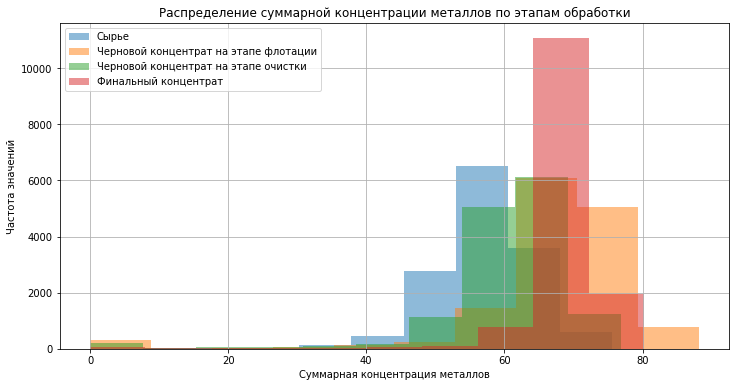

In [35]:
plt.figure(figsize=(12,6))
plt.hist(rougher_input_feed,
         alpha = 0.5,
         label='Сырье')
plt.hist(rougher_output_concentrate,
         alpha = 0.5,
         label='Черновой концентрат на этапе флотации')
plt.hist(primary_cleaner_output_concentrate,
         alpha = 0.5,
         label='Черновой концентрат на этапе очистки')
plt.hist(final_output_concentrate,
         alpha = 0.5,
         label='Финальный концентрат')
plt.xlabel('Суммарная концентрация металлов')
plt.ylabel('Частота значений')
plt.title('Распределение суммарной концентрации металлов по этапам обработки')
plt.legend()
plt.grid(True)
plt.show()

### Вывод

На этапе флотации наблюдаем примерно равное количество всех веществ разной концентрации, по мере завершения процесса обогащения количество и концентарция золота в продукте значительно возрастает, концентрация других веществ снижается, что соответствует ожидаемым стадиям технологического процесса.

Размеры гранул сырья на обучающей и тестовой выборках примерно равны, что позволит сделать более точные предсказания модели.

Суммарная концентрация металлов значительно возрастает на завершающем этапе процесса обогащения, что так же соответствует ожидаемым стадиям технологического процесса. На всех этапах обработки в суммарной концентрации есть аномальные нулевые значения, удалим их. После обработки данных всплеск значений около нуля остался, возможно это близкие к нулю значения.

## Модель

Получим список признаков тестовой выборки:

In [36]:
test_columns = test.columns.drop('date')

Определим признаки:

In [37]:
features = train[test_columns]

Определим целевые признаки:

In [38]:
target = train[['rougher.output.recovery', 'final.output.recovery']]

Напишем функцию для вычисления итоговой метрики:

In [39]:
def smape (target, predictions):
    target_rougher = target['rougher.output.recovery']
    predictions_rougher = predictions[:,0]
    target_final = target['final.output.recovery']
    predictions_final = predictions[:,1]
    rougher = (
        abs(target_rougher - predictions_rougher) / ((abs(target_rougher) + abs(predictions_rougher)) / 2)
    ).mean() * 100
    final = (
        abs(target_final - predictions_final) / ((abs(target_final) + abs(predictions_final)) / 2)
    ).mean() * 100
    smape = 0.25 * rougher + 0.75 * final
    return smape

Создадим метрику для оценки качества модели:

In [40]:
smape_score = make_scorer(smape, greater_is_better=False)

Создадим модель линейной регрессии:

In [41]:
lr = LinearRegression()

Оценим качество модели методом кросс-валидации:

In [42]:
scores = cross_val_score(lr, features, target, scoring=smape_score, cv=5)

Посмотрим список оценок:

In [43]:
scores

array([-12.46236043,  -9.09435781,  -8.34308575,  -8.02982535,
       -12.21698759])

Рассчитаем значение средней метрики:

In [44]:
scores.mean()

-10.029323387636314

Создадим модель случайного леса:

In [45]:
rfr = RandomForestRegressor(random_state=42)

Настроим подбор гиперпараметров (для экономии времени количество деревьев переберём вручную):

In [46]:
params = {'n_estimators' : [80],
             'max_depth' : range(1, 15)}

Создадим модуль GridSearchCV:

In [47]:
grid = GridSearchCV(rfr, params, scoring=smape_score, cv=5)

Обучим его:

In [48]:
%%time
grid.fit(features, target)

CPU times: user 28min 55s, sys: 793 ms, total: 28min 56s
Wall time: 1h 11min 26s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 15), 'n_est

Посмотрим лучшие параметры:

In [49]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 80}

Посмотрим лучшую метрику:

In [50]:
grid.best_score_

-8.647497122706572

Сохраним лучшую модель:

In [51]:
model = grid.best_estimator_

Дополним тестовую выборку целевым признаком:

In [52]:
test = test.merge(full[['date', 'rougher.output.recovery', 'final.output.recovery']], on=['date'], how='left')

Посмотрим, что получилось:

In [53]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

Посмотрим долю пропусков в тестовой выборке:

In [54]:
test.isna().mean()

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

Посмотрим размер тестовой выборки:

In [55]:
test.shape

(5290, 55)

Удалим пропуски:

In [56]:
test = test.dropna().reset_index(drop=True)

Посмотрим, что получилось:

In [57]:
test.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 55 columns):
date                                          5229 non-null bool
primary_cleaner.input.sulfate                 5229 non-null bool
primary_cleaner.input.depressant              5229 non-null bool
primary_cleaner.input.feed_size               5229 non-null bool
primary_cleaner.input.xanthate                5229 non-null bool
primary_cleaner.state.floatbank8_a_air        5229 non-null bool
primary_cleaner.state.floatbank8_a_level      5229 non-null bool
primary_cleaner.state.floatbank8_b_air        5229 non-null bool
primary_cleaner.state.floatbank8_b_level      5229 non-null bool
primary_cleaner.state.floatbank8_c_air        5229 non-null bool
primary_cleaner.state.floatbank8_c_level      5229 non-null bool
primary_cleaner.state.floatbank8_d_air        5229 non-null bool
primary_cleaner.state.floatbank8_d_level      5229 non-null bool
rougher.input.feed_ag                         52

Определим признаки для тестовой выборки:

In [58]:
features_test = test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

Определим целевые признаки:

In [59]:
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

Получим предсказания лучшей модели на тестовой выборке:

In [60]:
predictions_test = model.predict(features_test)

Посмотрим метрику:

In [61]:
smape(target_test, predictions_test)

8.786241623965761

Посмотрим метрику константной модели:

In [62]:
dummy = DummyRegressor(strategy='median')

In [63]:
dummy.fit(features, target)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [64]:
predictions_dummy = dummy.predict(features_test)

In [65]:
smape(target_test, predictions_dummy)

9.012702307130947

### Вывод

Определены признаки и целевой признак. К признакам относятся все признаки тестовой выборки, за исключением 'date', т.к. дата не влияет на эффективность обогащения концентрата и утяжелит обучение модели. Целевых признаков два:

* эффективность обогащения чернового концентрата,
* эффективность обогащения финального концентрата.

На обучающем наборе данных обучены и проверены методом кросс-валидации модели, итоговые метрики sMAPE моделей:

* линейная регрессия 10.029,
* случайный лес 8.647.

Лучшей моделью является случайный лес, итоговая метрика sMAPE на тестовой выборке 8.786.

## Общий вывод

Данные изучены, доля пропусков в данных около 10%, пропуски заполнены ближайшими по времени значениями, дубликатов в данных нет.

Проведен исследовательский анализ данных, в ходе анализа выявлены аномальные нулевые значения суммарной концентрации металлов на всех этапах обработки, аномальные значения удалены.

В качестве метрики оценки моделей используется sMAPE, т.к. прогнозируем сразу две величины, итогвая sMAPE складываетя из двух соответствующих величин.

На обучающем наборе данных обучены и проверены методом кросс-валидации модели, итоговые метрики sMape моделей:

* линейная регрессия 10.029,
* случайный лес 8.647.

Лучшей моделью является случайный лес, итоговая метрика sMAPE на тестовой выборке 8.786.